**Python Basics For Finance: Pandas**

When you’re using Python for finance, you’ll often find yourself using the data manipulation package, Pandas. But also other packages such as NumPy, SciPy, Matplotlib,… will pass by once you start digging deeper.

For now, let’s focus on Pandas and using it to analyze time series data. This section will explain how you can import data, explore and manipulate it with Pandas. On top of all of that, you’ll learn how you can perform common financial analyses on the data that you imported.

Importing Financial Data Into Python
The pandas-datareader package allows for reading in data from sources such as Google, World Bank,… If you want to have an updated list of the data sources that are made available with this function, go to look for its documantation.

In [ ]:
import pandas as pd
import pandas_datareader as pdr
import datetime 
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2009, 10, 1),
                          end=datetime.datetime(2020, 2, 14))

In [ ]:
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-04,319.640015,313.630005,315.309998,318.850006,34154100.0,318.095062
2020-02-05,324.760010,318.950012,323.519989,321.450012,29706700.0,320.688934
2020-02-06,325.220001,320.260010,322.570007,325.209991,26356400.0,324.440002
2020-02-07,323.399994,318.000000,322.369995,320.029999,29421000.0,320.029999
2020-02-10,321.549988,313.850006,314.179993,321.549988,27275400.0,321.549988


Working With Time Series Data
The first thing that you want to do when you finally have the data in your workspace is getting your hands dirty. However, now that you’re working with time series data, this might not seem as straightforward, since your index now contains DateTime values.


No worries, though! Let’s start step-by-step and explore the data first with some functions that you might already know if you have some prior programming experience with R or if you’ve previously worked with Pandas.


Either way, you’ll see it’s pretty straightforward!

As you saw in the code chunk above, you have used pandas_datareader to import data into your workspace. The resulting object aapl is a DataFrame, which is a 2-dimensional labeled data structure with columns of potentially different types. Now, one of the first things that you probably do when you have a regular DataFrame on your hands, is running the head() and tail() functions to take a peek at the first and the last rows of your DataFrame. Luckily, this doesn’t change when you’re working with time series data!

In [ ]:
#@title A True BI System has many inputs and outputs, we can add features to make it more interactive
startyear = int(input('Please Enter start year: '))
startmonth = int(input('Please Enter start month: '))
startday = int(input('Please Enter start day: '))

endyear = int(input('Please Enter end year: '))
endmonth = int(input('Please Enter end month: '))
endday = int(input('Please Enter end day: '))


Please Enter start year: 2009
Please Enter start month: 7
Please Enter start day: 14
Please Enter end year: 2019
Please Enter end month: 7
Please Enter end day: 14


In [ ]:
#@title Continued form the previous part
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(startyear, startmonth, startday),
                          end=datetime.datetime(endyear, endmonth, endday))

aapl.tail()
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000
mean,601.831796,589.098844,595.893476,595.799774,4.773552e+06,595.799774
std,540.007108,528.912301,535.048311,534.690000,3.225837e+06,534.690000
min,78.959999,77.510002,78.269997,78.139999,9.844000e+05,78.139999
25%,212.490005,204.320007,206.729996,209.490005,2.883200e+06,209.490005
50%,337.500000,331.660004,335.260010,334.019989,3.995100e+06,334.019989
75%,830.140015,819.559998,823.820007,822.960022,5.628000e+06,822.960022
max,2050.500000,2013.000000,2038.109985,2039.510010,5.830580e+07,2039.510010


This data contains the four columns with the opening and closing price per day and the extreme high and low price movements for the Apple stock for each day. Additionally, you also get two extra columns: Volume and Adj Close.

The former column is used to register the number of shares that got traded during a single day. The latter, on the other hand, is the adjusted closing price: it’s the closing price of the day that has been slightly adapted to include any actions that occurred at any time before the next day’s open. You can use this column to examine historical returns or when you’re performing a detailed analysis on historical returns.

Note how the index or row labels contain dates, and how your columns or column labels contain numerical values.

Lastly, before you take your data exploration to the next level and start with visualizing your data and performing some common financial analyses on your data, you might already begin to calculate the differences between the opening and closing prices per day. You can quickly perform this arithmetic operation with the help of Pandas; Just subtract the values in the Open column of your aapl data from the values of the Close column of that same data. Or, in other words, deduct aapl.Close from aapl.Open.

In [ ]:
aapl['diff'] = aapl.Open - aapl.Close

In [ ]:
aapl['diff2']= aapl.High - aapl.Low

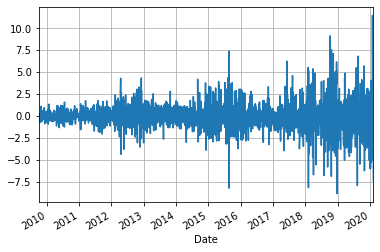

In [ ]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['diff'].plot(grid=True)

# Show the plot
plt.show()

**Common Financial Analysis**

Now that you have an idea of your data, what time series data is about and how you can use pandas to explore your data quickly, it’s time to dive deeper into some of the common financial analyses that you can do so that you can actually start working towards developing a trading strategy.

**Returns**

The simple daily percentage change doesn’t take into account dividends and other factors and represents the amount of percentage change in the value of a stock over a single day of trading. You will find that the daily percentage change is easily calculated, as there is a pct_change() function included in the Pandas package to make your life easier:

In [ ]:
# Import `numpy` as `np`
import numpy as np

daily_close = aapl[['Close']]
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

               Close
Date                
2009-10-01       NaN
2009-10-02  0.022092
2009-10-05  0.006039
2009-10-06  0.021222
2009-10-07  0.001262
...              ...
2019-11-15  0.011809
2019-11-18  0.005029
2019-11-19 -0.003037
2019-11-20 -0.011710
2019-11-21 -0.004494

[2554 rows x 1 columns]


Knowing how to calculate the returns is a valuable skill, but you’ll often see that these numbers don’t really say much when you don’t compare them to other stock. That’s why you’ll often see examples where two or more stocks are compared. In the rest of this section, you’ll focus on getting more data from Yahoo! Finance so that you can calculate the daily percentage change and compare the results.

Note that, if you want to be doing this, you’ll need to have a more thorough understanding of Pandas and how you can manipulate your data with Pandas!

Let’s start! Get more data from Yahoo! Finance first. You can easily do this by making a function that takes in the ticker or symbol of the stock, a start date and an end date. The next function that you see, data(), then takes the ticker to get your data from the startdate to the enddate and returns it so that the get() function can continue. You map the data with the right tickers nd return a DataFrame that concatenates the mapped data with tickers.

Check out the code below, where the stock data from Apple, Microsoft, IBM, and Google are loaded and gathered into one big DataFrame:

In [ ]:
year = int(input('From how many years ago you want the analysis? '))

From how many years ago you want the analysis? 4


In [ ]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

now = datetime.datetime.now()
past = datetime.datetime.now() - datetime.timedelta(days=year*365)

In [ ]:
tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, past, now)

all_data.tail()

High          Low  ...     Volume    Adj Close
Ticker Date                                  ...                        
GOOG   2019-11-18  1335.529053  1317.500000  ...  1487400.0  1320.699951
       2019-11-19  1327.699951  1312.800049  ...  1269200.0  1315.459961
       2019-11-20  1315.000000  1291.150024  ...  1308600.0  1303.050049
       2019-11-21  1312.589966  1293.000000  ...   995500.0  1301.349976
       2019-11-22  1308.729980  1291.410034  ...  1203268.0  1295.339966

[5 rows x 6 columns]

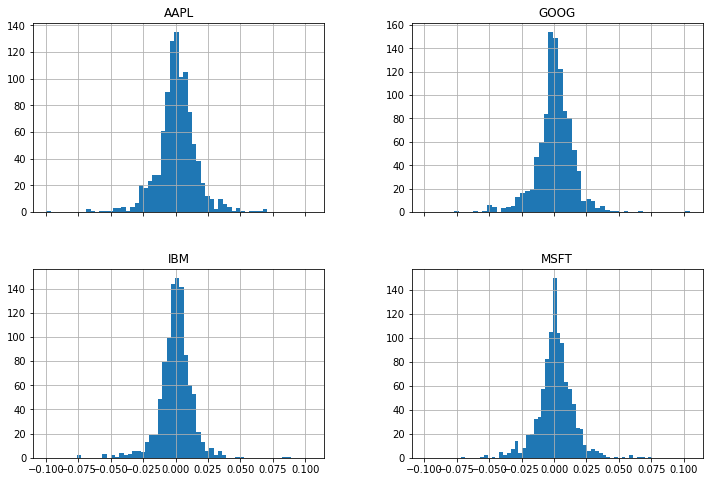

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

Another useful plot is the scatter matrix. You can easily do this by using the pandas library. Don’t forget to add the scatter_matrix() function to your code so that you actually make a scatter matrix :) As arguments, you pass the daily_pct_change and as a diagonal, you set that you want to have a Kernel Density Estimate (KDE) plot. Additionally, you can set the transparency with the alpha argument and the figure size with figsize.

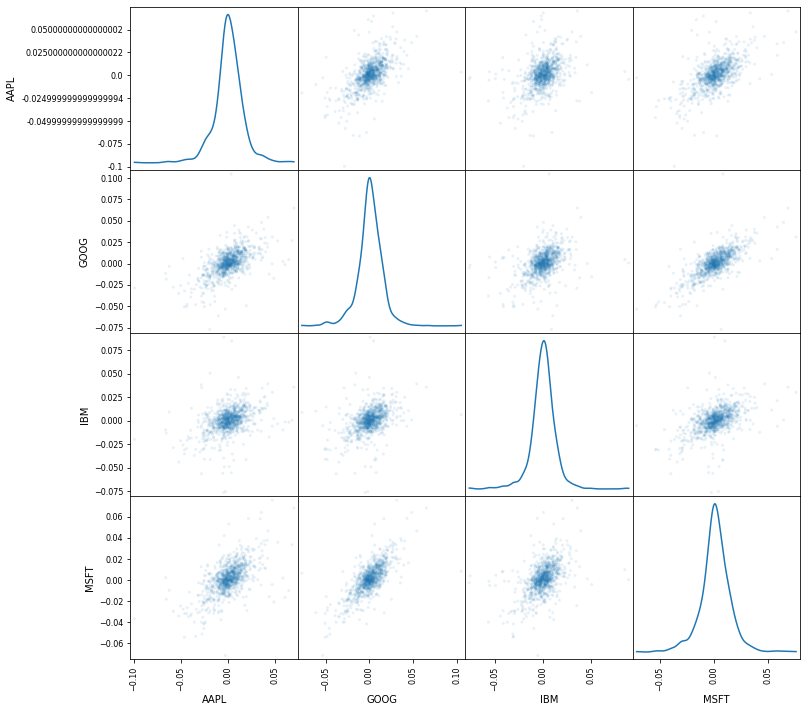

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

**Moving Windows**

Moving windows are there when you compute the statistic on a window of data represented by a particular period of time and then slide the window across the data by a specified interval. That way, the statistic is continually calculated as long as the window falls first within the dates of the time series.

**Volatility Calculation**

The volatility of a stock is a measurement of the change in variance in the returns of a stock over a specific period of time. It is common to compare the volatility of a stock with another stock to get a feel for which may have less risk or to a market index to examine the stock’s volatility in the overall market. Generally, the higher the volatility, the riskier the investment in that stock, which results in investing in one over another.

the moving historical standard deviation of the log returns—i.e. the moving historical volatility—might be more of interest: Also make use of pd.rolling_std(data, window=x) * math.sqrt(window) for the moving historical standard deviation of the log returns (aka the moving historical volatility).

The volatility is calculated by taking a rolling window standard deviation on the percentage change in a stock. You can clearly see this in the code because you pass daily_pct_change and the min_periods to rolling_std().

Note that the size of the window can and will change the overall result: if you take the window wider and make min_periods larger, your result will become less representative. If you make it smaller and make the window more narrow, the result will come closer to the standard deviation.

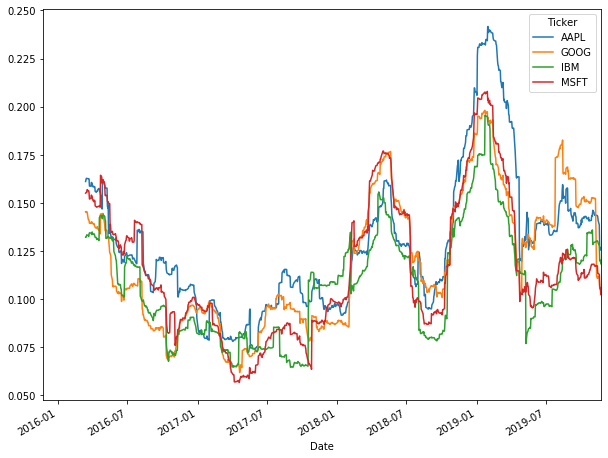

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

**Common Trading Strategies**

A trading strategy is a fixed plan to go long or short in markets, but much more information you didn’t really get yet; In general, there are two common trading strategies: the momentum strategy and the reversion strategy.

Firstly, the momentum strategy is also called divergence or trend trading. When you follow this strategy, you do so because you believe the movement of a quantity will continue in its current direction. Stated differently, you believe that stocks have momentum or upward or downward trends, that you can detect and exploit.

Some examples of this strategy are the moving average crossover, the dual moving average crossover, and turtle trading:

* The moving average crossover is when the price of an asset moves from one side of a moving average to the other. This crossover represents a change in momentum and can be used as a point of making the decision to enter or exit the market. You’ll see an example of this strategy, which is the “hello world” of quantitative trading later on in this tutorial.
* The dual moving average crossover occurs when a short-term average crosses a long-term average. This signal is used to identify that momentum is shifting in the direction of the short-term average. A buy signal is generated when the short-term average crosses the long-term average and rises above it, while a sell signal is triggered by a short-term average crossing long-term average and falling below it.
* Turtle trading is a popular trend following strategy that was initially taught by Richard Dennis. The basic strategy is to buy futures on a 20-day high and sell on a 20-day low.

Let's develop a simple strategy: you create two separate Simple Moving Averages (SMA) of a time series with differing lookback periods, let’s say, 40 days and 100 days. If the short moving average exceeds the long moving average then you go long, if the long moving average exceeds the short moving average then you exit.

Remember that when you go long, you think that the stock price will go up and will sell at a higher price in the future (= buy signal); When you go short, you sell your stock, expecting that you can buy it back at a lower price and realize a profit (= sell signal).

This simple strategy might seem quite complex when you’re just starting out, but let’s take this step by step:



* First define your two different lookback periods: a short window and a long window. You set up two variables and assign one integer per variable. Make sure that the integer that you assign to the short window is shorter than the integer that you assign to the long window variable!

* Next, make an empty signals DataFrame, but do make sure to copy the index of your aapl data so that you can start calculating the daily buy or sell signal for your aapl data.
Create a column in your empty signals DataFrame that is named signal and initialize it by setting the value for all rows in this column to 0.0.

* After the preparatory work, it’s time to create the set of short and long simple moving averages over the respective long and short time windows. Make use of the rolling() function to start your rolling window calculations: within the function, specify the window and the min_period, and set the center argument. In practice, this will result in a rolling() function to which you have passed either short_window or long_window, 1 as the minimum number of observations in the window that are required to have a value, and False, so that the labels are not set at the center of the window. Next, don’t forget to also chain the mean() function so that you calculate the rolling mean.

* After you have calculated the mean average of the short and long windows, you should create a signal when the short moving average crosses the long moving average, but only for the period greater than the shortest moving average window. In Python, this will result in a condition: signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:]. Note that you add the [short_window:] to comply with the condition “only for the period greater than the shortest moving average window”. When the condition is true, the initialized value 0.0 in the signal column will be overwritten with 1.0. A “signal” is created! If the condition is false, the original value of 0.0 will be kept and no signal is generated. You use the NumPy where() function to set up this condition. Much the same like you read just now, the variable to which you assign this result is signals['signal'][short_window], because you only want to create signals for the period greater than the shortest moving average window!

* Lastly, you take the difference of the signals in order to generate actual trading orders. In other words, in this column of your signals DataFrame, you’ll be able to distinguish between long and short positions, whether you’re buying or selling stock.


In [ ]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

            signal  short_mavg  long_mavg  positions
Date                                                
2010-11-18     0.0   34.189999  34.189999        NaN
2010-11-19     0.0   34.224998  34.224998        0.0
2010-11-22     0.0   34.176666  34.176666        0.0
2010-11-23     0.0   33.945000  33.945000        0.0
2010-11-24     0.0   33.852000  33.852000        0.0
...            ...         ...        ...        ...
2019-11-15     0.0   36.694250  37.824200        0.0
2019-11-18     0.0   36.678750  37.807200        0.0
2019-11-19     0.0   36.669000  37.785700        0.0
2019-11-20     0.0   36.623250  37.751000        0.0
2019-11-21     0.0   36.549750  37.714300        0.0

[2268 rows x 4 columns]


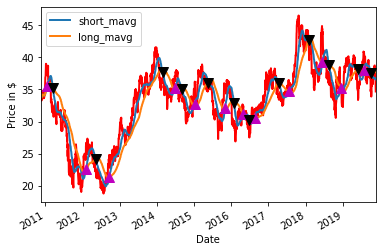

In [ ]:
# Import `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [ ]:
#@title Validating our strategy by simulation
# Set the initial capital
initial_capital= float(1000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.head())

            AAPL  holdings    cash   total  returns
Date                                               
2010-11-18   0.0       0.0  1000.0  1000.0      NaN
2010-11-19   0.0       0.0  1000.0  1000.0      0.0
2010-11-22   0.0       0.0  1000.0  1000.0      0.0
2010-11-23   0.0       0.0  1000.0  1000.0      0.0
2010-11-24   0.0       0.0  1000.0  1000.0      0.0


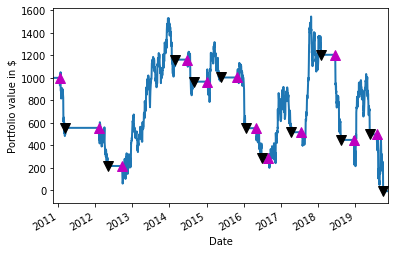

In [ ]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

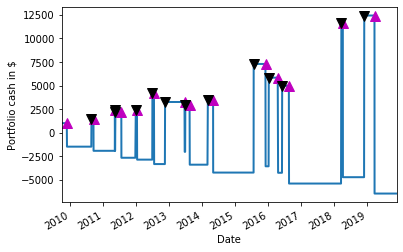

In [ ]:
#portfolio['cash'] + portfolio['holdings']
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio cash in $')

# Plot the equity curve in dollars
portfolio['cash'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

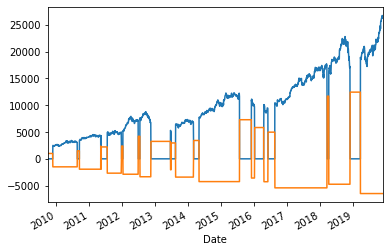

In [ ]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt


# Create a figure
fig = plt.figure(1)

# Plot the equity curve in dollars
portfolio['holdings'].plot()
portfolio['cash'].plot()

